# Project 3 - Part 2

## Business problem

- Produce a MySQL database on movies from a subset of IMDB's publicly available dataset.
- Use this database to analyze what makes a movie successful.
- Provide recommendations to the stakeholder on how to make a successful movie.

## Requirements

- Load in your csv.gz's of results for each year extracted
- Concatenate the data into 1 dataframe for the remainder of the analysis
    - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
    - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    - What is the average revenue per certification category?
    - What is the average budget per certification category?
- Save a final merged .csv.gz of all of the tmdb api data called "tmdb_results_combined.csv.gz"nk

## Imports

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use(['dark_background','seaborn-v0_8-pastel'])

## Code

In [3]:
## Load data
movies_2000 = pd.read_csv("Data/movies_2000_final.csv.gz", low_memory=False)
movies_2001 = pd.read_csv("Data/movies_2001_final.csv.gz", low_memory=False)
print("Movies in 2000:", movies_2000.shape[0], "Movies in 2001:", movies_2001.shape[0])

Movies in 2000: 1269 Movies in 2001: 1366


In [4]:
## Concatenate to create one df
concat_movies = pd.concat([movies_2000, movies_2001], axis=0)

In [5]:
concat_movies.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.101,2375.0,PG


### How many movies had at least some valid financial information (values > 0 for budget OR revenue)? Exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [6]:
valid_movies_df = concat_movies[(concat_movies['budget'] > 0) | (concat_movies['revenue'] > 0)]
print("Movies with valid financial information:", valid_movies_df.shape[0]) 

Movies with valid financial information: 650


In [7]:
movies_df = concat_movies[(concat_movies['budget'] > 0)]
movies_df = concat_movies[(concat_movies['revenue'] > 0)]
print("Movies for visualisations:", movies_df.shape[0]) 

Movies for visualisations: 460


### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [8]:
movies_df.value_counts('certification')

certification
R        164
PG-13    116
PG        31
G         16
NR         9
dtype: int64

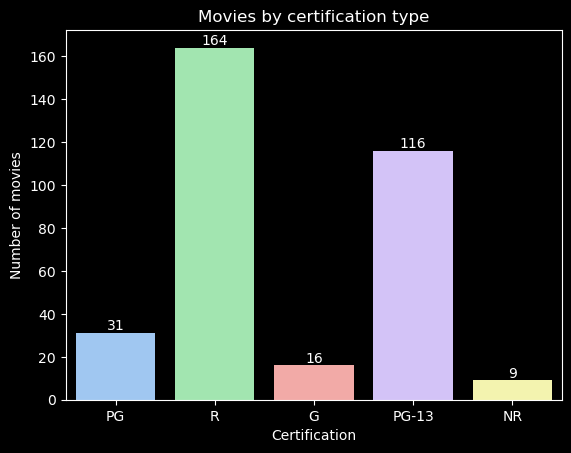

In [9]:
ax = sns.countplot(data=movies_df, x='certification')

for i in ax.patches:
    ax.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                textcoords='offset points')

ax.set_xlabel('Certification')
ax.set_ylabel('Number of movies')
ax.set_title('Movies by certification type')
plt.show();

### What is the average revenue per certification category? (Answer in millions)

In [10]:
movies_df.groupby('certification')['revenue'].mean() / 1000000

certification
G        110.957400
NR         8.262645
PG       110.868021
PG-13     97.868445
R         42.598503
Name: revenue, dtype: float64

### What is the average budget per certification category? (Answer in millions)

In [11]:
movies_df.groupby('certification')['budget'].mean() / 1000000

certification
G        35.750000
NR        3.300000
PG       45.427330
PG-13    43.632736
R        21.836061
Name: budget, dtype: float64